## The libraries we may need for computer vision tasks are listed as below:

In [ ]:

from torch import nn

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## Below is the dataset (FashionMNIST) we are going to use throughout the tutorial...

In [ ]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx


{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

### Let's visualize data...

Text(0.5, 1.0, 'Image 9')

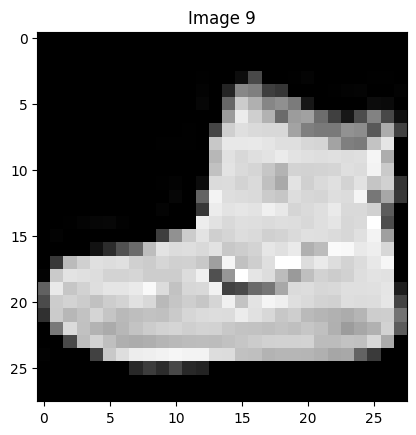

In [ ]:
image, lable = train_data[0]
# plt.imshow(image.squeeze())
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Image 9")

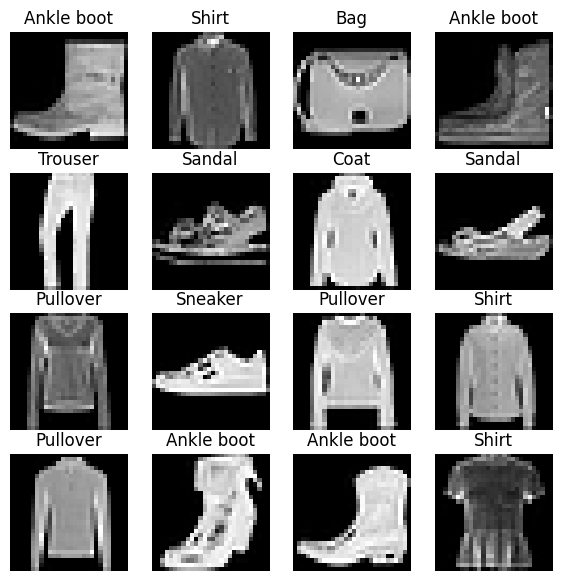

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(7, 7))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item() # Since torch.randint() returns a tensor, .item() is used to extract a single Python integer value from the tensor.
  # print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

train_dataloader, test_dataloader

print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of size {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of size {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x78d3abb4afe0>, <torch.utils.data.dataloader.DataLoader object at 0x78d3abb4bfa0>)
Length of train_dataloader: 1875 batches of size 32...
Length of test_dataloader: 313 batches of size 32...


In [ ]:
# let's check what is inside each dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch

(torch.Size([32, 1, 28, 28]),
 tensor([5, 1, 8, 1, 5, 2, 6, 7, 3, 5, 9, 5, 7, 5, 0, 4, 4, 4, 4, 6, 1, 8, 0, 1,
         9, 7, 8, 8, 3, 3, 7, 2]))

Image Size: torch.Size([1, 28, 28])
Lable: 8, Label Size: torch.Size([])


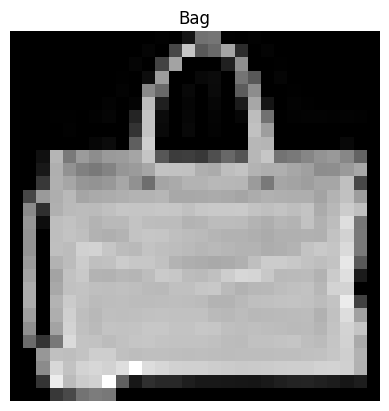

In [ ]:
# torch.manual_seed(42)
# This part of the code extracts a single value from the tensor generated by torch.randint().
# Since torch.randint() returns a tensor, .item() is used to extract a single Python integer value from the tensor.
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Lable: {label}, Label Size: {label.shape}")

## Now let's create our first CV model...
In order to do so, it is more practical to start with a baseline model and then try to improve its performance.

In [ ]:
# Through the code snippet below, we will flatten the batch data

flatten_model = nn.Flatten()
# get a single sample
x = train_features_batch[0]
# flatten the sample
output = flatten_model(x)

print(f"batch shape before flattening: {x.shape}")
print(f"batch shape before flattening: {output.shape}")

# print(output.squeeze())

batch shape before flattening: torch.Size([1, 28, 28])
batch shape before flattening: torch.Size([1, 784])


In [ ]:
from torch import nn

class ModelFashionMNISTV0(nn.Module):
  def __init__(self,
              input_shape: int,
              hidden_units: int,
              output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

model_0 = ModelFashionMNISTV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)).to("cpu")

model_0

ModelFashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## Setting up loss function, optimizer, and evaluation metrics:

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_function.py already exists!")
else:
  print("Downloading helper_functions.py...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
    print("Download completed!")


helper_function.py already exists!


In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Two main things to track are as follows:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.697000051441137e-05

## Now we create the training loop and training a model on batches of data:

In [ ]:
# import tqdm for progress bar

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------")
  # Training
  train_loss = 0
  # loop in the form of (X, y) since each item is composed of an image (x) and its label (y)
  # so that we can keep track of the number of batches we have been through
  # ALSO, without enumerate(), you won't have access to the index of each data sample within the loop.
  # This may be problematic if you need to track the index for any reason, such as logging, monitoring, or debugging purposes.
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # forward propagation
    y_pred = model_0(X)
    # loss computation per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss
    # optimizer zero grad (which will be effective from the 2nd iteration on)
    optimizer.zero_grad()
    # backward propagation
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.") # len(train_dataloader.dataset) returns total number of items in the dataset

  # divide total train loss by the length of train data loader
  # since we have accumulated the loss above, we have to average that across how many batches there are in the train_dataloader
  train_loss /= len(train_dataloader)

  # testing
  test_loss, test_acc = 0, 0
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      # calculate loss accumulatively
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # print out what is happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters())))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.59039 | Test loss: 0.51016, Test acc: 82.04%

Epoch: 1
-----------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.47435 | Test loss: 0.52677, Test acc: 81.68%

Epoch: 2
-----------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.45367 | Test loss: 0.51264, Test acc: 83.00%

Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0071,  ...,  0.0009,  0.0065,  0.0173],
        [-0.0189, -0.0356,  0.0156,  ...,  0.0196,  0.0118,  0.0108],
        [-0.0008,  0.0019,  0.0030,  ...,  0.0143, -0.0122,  0.0079],
        ...,
        [-0.

### IMPORTANT note to learn about
In order to check if this piece of code (e.g. device=str(next(model_0.parameters())))) works, we can check each layer separately as below:
* 1st check if model_0.parameters() works
* 2nd check if next(model_0.parameters()) works
* 3rd check if str(next(model_0.parameters())) works

### Now after training and testing our model, let's make some predictions in an integrated fashion and get model 0 results.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Returns a dictionary containing the results of model predicting on data_loader. """
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'ModelFashionMNISTV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

### Set up device agnostic code and test the model on GPU.

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Model 1: Building a Better Model with Non-linearity

In [ ]:
class ModelFashionMNISTV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
model_1 = ModelFashionMNISTV1(input_shape=784, # this is the output of the flatten layer
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set up loss, optimizer, and evaluation metrics

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update model params to reduce the loss
                            lr=0.1)

### Why don't we functionalize both the train and test steps as train_step() test_step(), and then release a newer version of our model?
#### Let's give it a shot...

In [ ]:
def train_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device
                ):
  """ Performs a training step with model trying to learn on data_loader. """

  train_loss, train_acc = 0, 0

  model.train()

  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    # forward propagation (outputs raw logits from the model)
    y_pred = model(X)
    # loss and accuracy computation per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # logits -> pred labels
    # optimizer zero grad (which will be effective from the 2nd iteration on)
    optimizer.zero_grad()
    # backward propagation
    loss.backward()
    optimizer.step()

  # divide total train loss and accuracy by the length of train data loader
  # since we have accumulated the loss above, we have to average that across how many batches there are in the train_dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device): # we already set the device as default
  """ Performs a testing loop step on model going over data_loader """
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  # turn on inference mode context manager
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # send the data to the target device
      X, y = X.to(device), y.to(device)
      # forward pass
      test_pred = model(X)
      # loss/accuracy calculation
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test Loss: {test_loss:.5f} | Test Acc.: {test_acc:.2f}")

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Train Loss: 0.69330 | Train Acc: 75.74%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.55066 | Test Acc.: 80.61
Epoch: 1
------------
Train Loss: 0.49623 | Train Acc: 82.24%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.49276 | Test Acc.: 82.57
Epoch: 2
------------
Train Loss: 0.46944 | Train Acc: 83.22%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.48156 | Test Acc.: 82.69
Train time on cpu: 37.654 seconds


In [ ]:
# Model 0 results
print(model_0_results)
# Train time on CPU = Model 0
print(total_train_time_model_0)

{'model_name': 'ModelFashionMNISTV0', 'model_loss': 0.512529730796814, 'model_acc': 83.00718849840256}
44.49137037499986


In [ ]:
# Get model 1 results dictionary

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'ModelFashionMNISTV1',
 'model_loss': 0.48196035623550415,
 'model_acc': 82.68769968051119}

### Model 2: Building a Convolutional Neural Network (CNN)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class ModelFashionMNISTV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,   # there is a trick here
                  out_features=output_shape)      # hidden_units*7*7 comes from the output of block 2,
                                                  # which should be printed after the code is run
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)

model_2 = ModelFashionMNISTV2(input_shape=1,  # we assume that our images are of a single channel
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
print(rand_image_tensor.shape)
print(rand_image_tensor.unsqueeze(1).shape)

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


In [ ]:
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [ ]:
# model_2.state_dict()

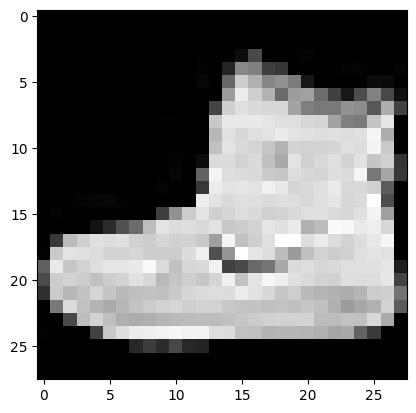

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

### Let's find out what is going on inside `nn.Conv2d()`:

In [ ]:
# we first create some dummy data (our model is also initialized with some random values)
# that is why we can demonstrate it through some dummpy data

torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [ ]:
# create a single conv2D layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image.unsqueeze(0))
print(test_image.shape)
print(conv_output.shape)

# as you may have noticed after running the code and creating the output,
# the output size is reduced to 60 as we expected (output size=((input size-kernel+2pad)/stride)+1)
# 64 --> 60

torch.Size([3, 64, 64])
torch.Size([1, 10, 62, 62])


In [ ]:
# # if you get a dimensionality error above, unsquuzing the image may help it (look below)
# test_image.unsqueeze(0).shape

### How about stepping through `nn.MaxPool2d()`?
#### Let's try it...

In [ ]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_maxpool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(1, 1, 2, 2)

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)

print(random_tensor)
print(random_tensor.shape)
print(max_pool_tensor)
print(max_pool_tensor.shape)

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
torch.Size([1, 1, 2, 2])
tensor([[[[0.3367]]]])
torch.Size([1, 1, 1, 1])


### Setup loss function and loss:

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### Training and Testing `model_2`

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                             end=train_time_end_model_2,
                                             device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Train Loss: 0.59518 | Train Acc: 78.38%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.39484 | Test Acc.: 85.99
Train time on cpu: 68.695 seconds
Epoch: 1
------------
Train Loss: 0.36396 | Train Acc: 86.87%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.34369 | Test Acc.: 87.57
Train time on cpu: 127.839 seconds
Epoch: 2
------------
Train Loss: 0.32485 | Train Acc: 88.25%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.32540 | Test Acc.: 88.33
Train time on cpu: 185.856 seconds


In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(data_loader=train_dataloader,
      model=model_2,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )
  test_step(data_loader=test_dataloader,
      model=model_2,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.30495 | Train Acc: 88.89%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.31429 | Test Acc.: 88.63
Epoch: 1
---------
Train Loss: 0.28945 | Train Acc: 89.57%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.29974 | Test Acc.: 89.15
Epoch: 2
---------
Train Loss: 0.27942 | Train Acc: 89.74%


  0%|          | 0/313 [00:00<?, ?it/s]

Test Loss: 0.32251 | Test Acc.: 88.67
Train time on cpu: 176.685 seconds


In [ ]:
# The results above are not really good and do not match to the result achieved in the video
# There is something wrong with the trainin and testing, but I could not resolve it
# However, the very last time I tried to run it, it worked perfectly...
# So, I guess you should give it a try and see whether it will eork or not!

In [ ]:
# Get model 2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'ModelFashionMNISTV2',
 'model_loss': 0.3228279650211334,
 'model_acc': 88.63817891373802}

In [ ]:
print(f"Model 0 results: \n-------- \n{model_0_results}")
print(f"\nModel 1 results: \n-------- \n{model_1_results}")
print(f"\nModel 2 results: \n-------- \n{model_2_results}")

Model 0 results: 
-------- 
{'model_name': 'ModelFashionMNISTV0', 'model_loss': 0.512529730796814, 'model_acc': 83.00718849840256}

Model 1 results: 
-------- 
{'model_name': 'ModelFashionMNISTV1', 'model_loss': 0.48196035623550415, 'model_acc': 82.68769968051119}

Model 2 results: 
-------- 
{'model_name': 'ModelFashionMNISTV2', 'model_loss': 0.3228279650211334, 'model_acc': 88.63817891373802}


### A more professional way of demonstrating our results, importing `pandas`...

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results

,model_name,model_loss,model_acc
0,ModelFashionMNISTV0,0.512530,83.007188
1,ModelFashionMNISTV1,0.481960,82.687700
2,ModelFashionMNISTV2,0.322828,88.638179


In [ ]:
# Add trainin time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,ModelFashionMNISTV0,0.512530,83.007188,44.491370
1,ModelFashionMNISTV1,0.481960,82.687700,37.653627
2,ModelFashionMNISTV2,0.322828,88.638179,176.685451


### As it can be seen, the training time for the 3rd experiment (`model_2`) is quite significant, which might be due to performing the training/testing on CPU rather GPU.

### We can also visualize our model results:

In [ ]:
# this is only to experiment how set_index works out of curiosity
compare_results.set_index("model_name")["model_acc"]

model_name
ModelFashionMNISTV0    83.007188
ModelFashionMNISTV1    82.687700
ModelFashionMNISTV2    88.638179
Name: model_acc, dtype: float64

Text(0, 0.5, 'model')

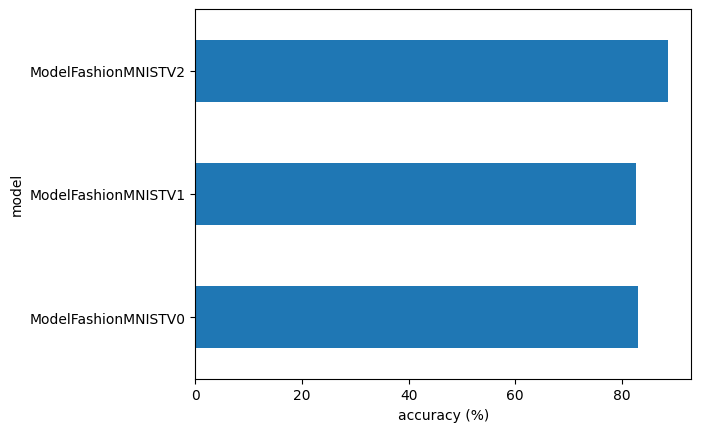

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")


In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
      for sample in data:
          # Prepare sample
          sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

          # Forward pass (model outputs raw logit)
          pred_logit = model(sample)

          # Get prediction probability (logit -> prediction probability)
          pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

          # Get pred_prob off GPU for further calculations
          pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [ ]:
# img, label = test_data[0]
# img, label

In [ ]:
img, label = test_data[0][:10] # I couldn't understand why this and not the one in the previous block!!
# img, label

In [ ]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9): # randomly sample 9 samples
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

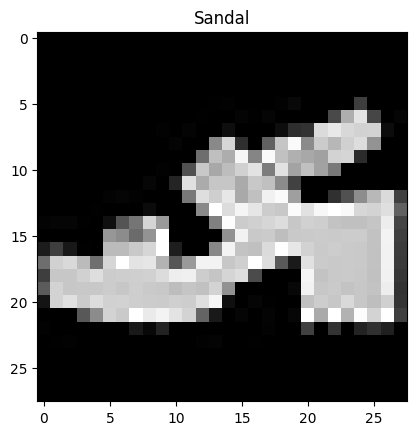

In [ ]:
plt.imshow(test_samples[0].squeeze(0), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# let's make some predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)


# print(type(pred_probs))
pred_probs[:2]


tensor([[6.4499e-08, 2.4473e-08, 1.2461e-08, 3.0808e-08, 5.9075e-09, 9.9990e-01,
         9.8842e-08, 5.7692e-06, 2.7779e-05, 6.1583e-05],
        [7.0482e-02, 5.1032e-01, 4.4129e-03, 1.2804e-01, 2.3836e-01, 1.2326e-04,
         4.6133e-02, 2.3699e-04, 1.7319e-03, 1.7020e-04]])

In [ ]:
# convert pred probs into labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [ ]:
list(pred_classes) == test_labels

True

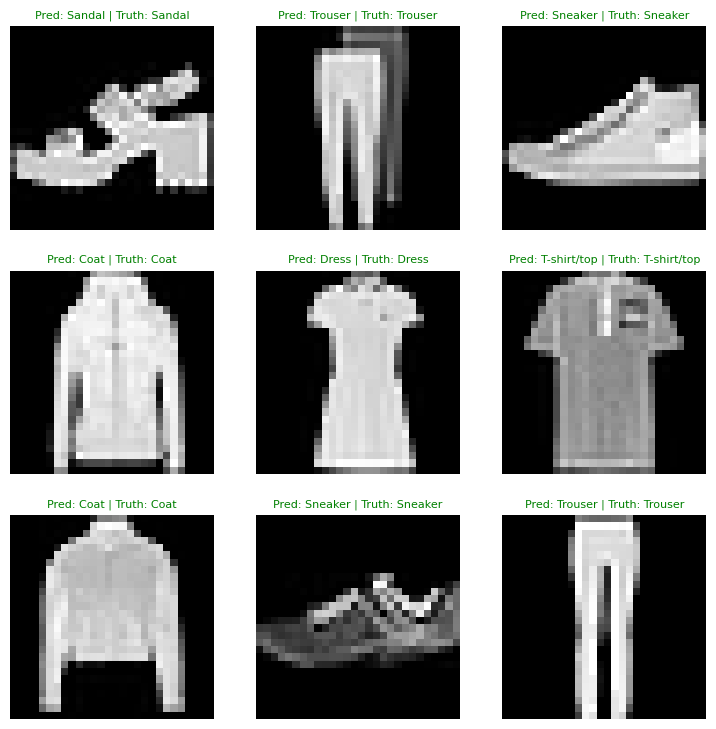

In [ ]:
# Let's plot the predictions

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # create plot
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  # create title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  #check for equality between pred and truth, and change color of the title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=8, c="g")
  else:
    plt.title(title_text, fontsize=8, c="r")
  plt.axis(False)

#### You can also try to exclude the seed we have set before and get some other random results and see whether there will be wrong predictions made or not, and observe what about the images has fooled the machine.

In [ ]:
# # sketching the confusion matrix
# from tqdm.auto import tqdm

# y_preds = []
# model_2.eval()

# with torch.inference_mode():
#   for X, y in tqdm(test_dataloader, desc="Making predictions"):
#     X, y = X.to(device), y.to(device)
#     y_logit = model_2(X)
#     # print(y_logit)
#     y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
#     y_preds.append(y_pred.cpu())

#   # print(y_preds)
# y_pred_tensor = torch.cat(y_preds)
# y_pred_tensor



# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.23.1


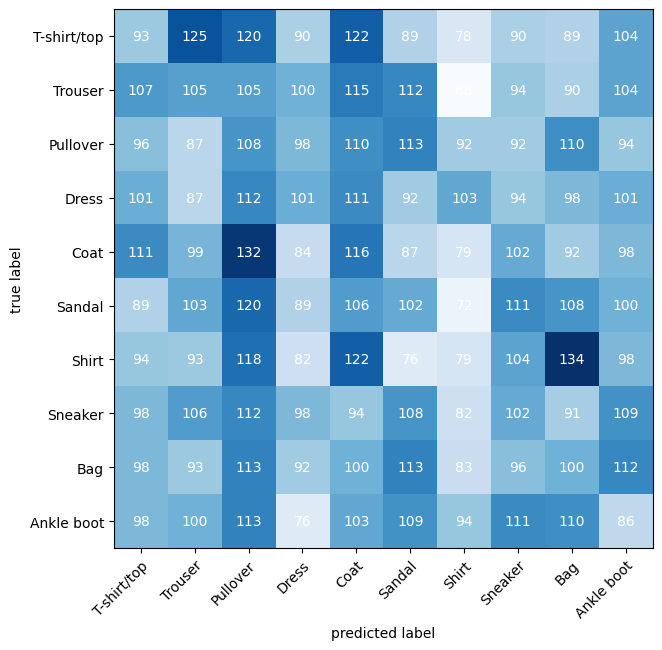

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat
confmat_tensor = confmat(preds=y_pred_tensor.cpu(),
                         target=test_data.targets)
confmat_tensor


fig, ax = plot_confusion_matrix(
   conf_mat=confmat_tensor.numpy(),
   class_names=class_names,
   figsize=(10, 7)
)


# there is of course something wrong with the confusion matrix produced
# since I do not have time for it, I go on with the rest...




# from torchmetrics import ConfusionMatrix
# from mlxtend.plotting import plot_confusion_matrix

# # 2. Setup confusion matrix instance and compare predictions to targets
# confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
# confmat_tensor = confmat(preds=y_pred_tensor,
#                          target=test_data.targets)

# # 3. Plot the confusion matrix
# fig, ax = plot_confusion_matrix(
#     conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
#     class_names=class_names, # turn the row and column labels into class names
#     figsize=(10, 7)
# );

In [ ]:
# Save the best performing model

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# load

loaded_model_2 = ModelFashionMNISTV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

ModelFashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'ModelFashionMNISTV2',
 'model_loss': 0.3228279650211334,
 'model_acc': 88.63817891373802}

In [ ]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'ModelFashionMNISTV2',
 'model_loss': 0.3230602443218231,
 'model_acc': 88.63817891373802}

In [ ]:
# check if model results are close to each other

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)